## Step 1 - import pyAgrum

In [2]:
import pyAgrum as gum

## Step 2 - Create an empty BayesNet with a specified name

In [3]:
bn=gum.BayesNet('WaterSprinkler')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


## Step 3 - Add variables

In [4]:
c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
print(c)

0


In [5]:
s, r, w = [ bn.add(name, 2) for name in "srw" ] #bn.add(name, 2) === bn.add(gum.LabelizedVariable(name, name, 2))
print (s,r,w)
print (bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 8}


## Step 4 - Add Arcs

In [6]:
bn.addArc(c,s)

In [7]:
for link in [(c,r),(s,w),(r,w)]:
    bn.addArc(*link)
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}


### Import lib.notebook to get visualizations

In [8]:
import pyAgrum.lib.notebook as gnb
bn

(gum::BayesNet<double>@0x29eb370) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

## Step 5 - Define CPTs for each variable

In [9]:
bn.cpt(c).fillWith([0.5,0.5])

(gum::Potential<double>@0x28fffe0) <c:0> :: 0.5 /<c:1> :: 0.5

In [10]:
bn.cpt("c").fillWith([0.4,0.6])

(gum::Potential<double>@0x28fffe0) <c:0> :: 0.4 /<c:1> :: 0.6

In [11]:
bn.cpt(s).var_names

['c', 's']

In [12]:
bn.cpt(s)[:]=[ [0.5,0.5],[0.9,0.1]]

In [13]:
print(bn.cpt(s)[1])

[0.9 0.1]


In [14]:
bn.cpt(s)[0,:]=0.5 # equivalent to [0.5,0.5]
bn.cpt(s)[1,:]=[0.9,0.1]

In [15]:
bn.cpt(w).var_names

['r', 's', 'w']

In [16]:
bn.cpt(w)[0,0,:] = [1, 0] # r=0,s=0
bn.cpt(w)[0,1,:] = [0.1, 0.9] # r=0,s=1
bn.cpt(w)[1,0,:] = [0.1, 0.9] # r=1,s=0
bn.cpt(w)[1,1,:] = [0.01, 0.99] # r=1,s=1

### Simplest way to assign CPTs is to use dictionaries

In [17]:
bn.cpt(w)[{'r': 0, 's': 0}] = [1, 0]
bn.cpt(w)[{'r': 0, 's': 1}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 0}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 1}] = [0.01, 0.99]
bn.cpt(w)

(gum::Potential<double>@0x22eb620) <w:0|s:0|r:0> :: 1 /<w:1|s:0|r:0> :: 0 /<w:0|s:1|r:0> :: 0.1 /<w:1|s:1|r:0> :: 0.9 /<w:0|s:0|r:1> :: 0.1 /<w:1|s:0|r:1> :: 0.9 /<w:0|s:1|r:1> :: 0.01 /<w:1|s:1|r:1> :: 0.99

In [18]:
bn.cpt(r)[{'c':0}]=[0.8,0.2]
bn.cpt(r)[{'c':1}]=[0.2,0.8]
bn.cpt(r)

(gum::Potential<double>@0x22936f0) <r:0|c:0> :: 0.8 /<r:1|c:0> :: 0.2 /<r:0|c:1> :: 0.2 /<r:1|c:1> :: 0.8

## Formats for saving BNs

In [19]:
print(gum.availableBNExts())

bif|dsl|net|bifxml|o3prm|uai


## Step 6 - Do Inference

### Setup the inference engine

In [20]:
ie=gum.LazyPropagation(bn)

### Unconditional queries (no evidence)

In [21]:
ie.makeInference()
print (ie.posterior(w))

<w:0> :: 0.33328 /<w:1> :: 0.66672


In [22]:
ie.posterior(w)

(gum::Potential<double>@0x2b9f260) <w:0> :: 0.33328 /<w:1> :: 0.66672

### Conditional queries (with evidence)

In [23]:
ie.setEvidence({'s':0, 'c': 0}) # hard evidence
ie.makeInference()
ie.posterior(w)

(gum::Potential<double>@0x2cd8fc0) <w:0> :: 0.82 /<w:1> :: 0.18

In [24]:
ie.setEvidence({'s': [0.5, 1], 'c': [1, 0]}) # soft evidence
ie.makeInference()
ie.posterior(w) # using gnb's feature

(gum::Potential<double>@0x2c95cb0) <w:0> :: 0.328 /<w:1> :: 0.672

### Show distributions

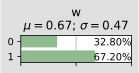

In [25]:
gnb.showProba(ie.posterior(w))

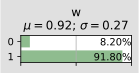

In [26]:
gnb.showPosterior(bn,{'s':1,'c':0},'w')

### Inference in whole Bayes Net

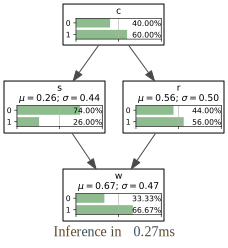

In [27]:
gnb.showInference(bn,evs={}) # no evidence

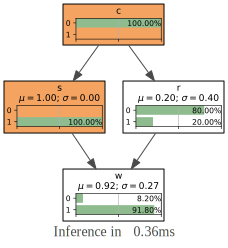

In [28]:
gnb.showInference(bn,evs={'s':1,'c':0}) # with hard evidence

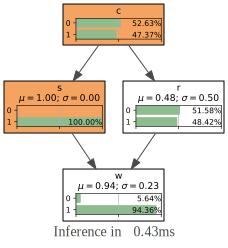

In [29]:
gnb.showInference(bn,evs={'s':1,'c':[0.3,0.9]}) # with evidence - hard and soft

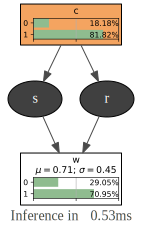

In [30]:
gnb.showInference(bn,evs={'c':[0.3,0.9]},targets={'c','w'}) # partial targets